# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE
        city_weather_response = requests.get(city_url)
        city_weather_json = city_weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_response.json()["coord"]["lat"]
        city_lng = city_weather_response.json()["coord"]["lon"]
        city_max_temp = city_weather_response.json()["main"]["temp_max"]
        city_humidity = city_weather_response.json()["main"]["humidity"]
        city_clouds = city_weather_response.json()["clouds"]["all"]
        city_wind = city_weather_response.json()["wind"]["speed"]
        city_country = city_weather_response.json()["sys"]["country"]
        city_date = city_weather_response.json()["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | naze
Processing Record 4 of Set 1 | caravelas
Processing Record 5 of Set 1 | olafsvik
Processing Record 6 of Set 1 | broken hill
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | ostrovnoy
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | waingapu
Processing Record 12 of Set 1 | mana
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | hami
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | green river
Processing Record 18 of Set 1 | alasehir
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | san cristobal
Processing Record 21 of Set 1 | englewood
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Set 1 | cidreira
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,torbay,47.6666,-52.7314,33.76,95,98,1.99,CA,1669161799
1,cherskiy,68.7500,161.3000,-38.49,100,42,1.07,RU,1669162034
2,naze,28.3667,129.4833,70.65,84,100,11.52,JP,1669162035
3,caravelas,-17.7125,-39.2481,71.64,89,69,5.03,BR,1669162036
4,olafsvik,64.8945,-23.7142,38.26,76,19,16.49,IS,1669162036
...,...,...,...,...,...,...,...,...,...
546,sosnovka,56.2550,51.2842,17.91,91,99,6.69,RU,1669162418
547,sfantu gheorghe,45.8667,25.7833,39.81,78,100,4.90,RO,1669162273
548,punta gorda,26.9298,-82.0454,75.24,88,100,11.99,US,1669162159
549,male,4.1748,73.5089,80.49,77,63,11.45,MV,1669162279


In [5]:
# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,torbay,47.6666,-52.7314,33.76,95,98,1.99,CA,1669161799
1,cherskiy,68.7500,161.3000,-38.49,100,42,1.07,RU,1669162034
2,naze,28.3667,129.4833,70.65,84,100,11.52,JP,1669162035
3,caravelas,-17.7125,-39.2481,71.64,89,69,5.03,BR,1669162036
4,olafsvik,64.8945,-23.7142,38.26,76,19,16.49,IS,1669162036


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,torbay,47.6666,-52.7314,33.76,95,98,1.99,CA,1669161799
1,cherskiy,68.7500,161.3000,-38.49,100,42,1.07,RU,1669162034
2,naze,28.3667,129.4833,70.65,84,100,11.52,JP,1669162035
3,caravelas,-17.7125,-39.2481,71.64,89,69,5.03,BR,1669162036
4,olafsvik,64.8945,-23.7142,38.26,76,19,16.49,IS,1669162036


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

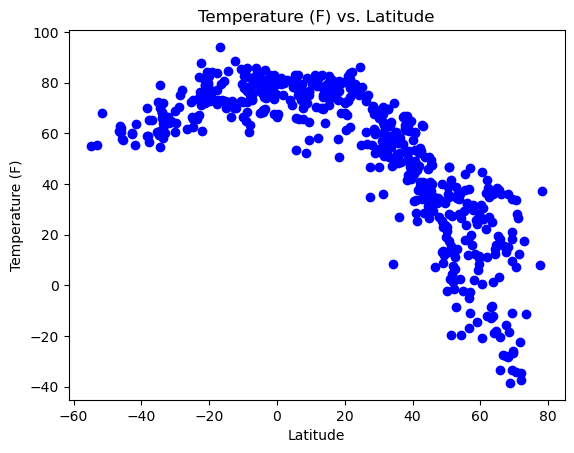

In [9]:
# Build scatter plot for latitude vs. temperature (f)
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [10]:
## Analysis
# The data show warmer temperatures at the equator and cooler as the distance from the equator increases.
# Therefore, temperatures are warmer at, or near, the equator.

#### Latitude Vs. Humidity

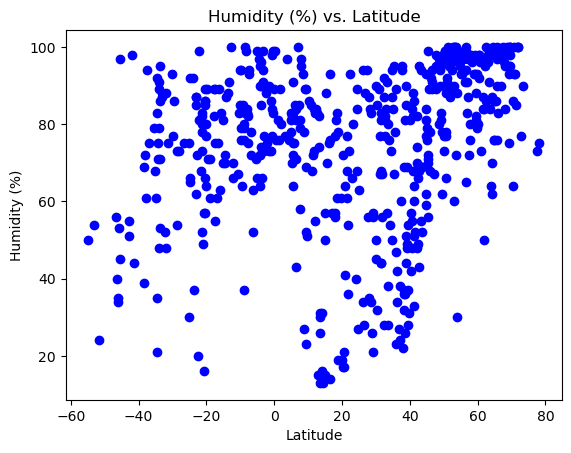

In [11]:
# Build the scatter plots for latitude vs. humidity
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [12]:
## Analysis
# The data seem to show that humidity increases as latitude increases, especially between a latitude of 40-70.  However,
# overall, humidity is scattered.

#### Latitude Vs. Cloudiness

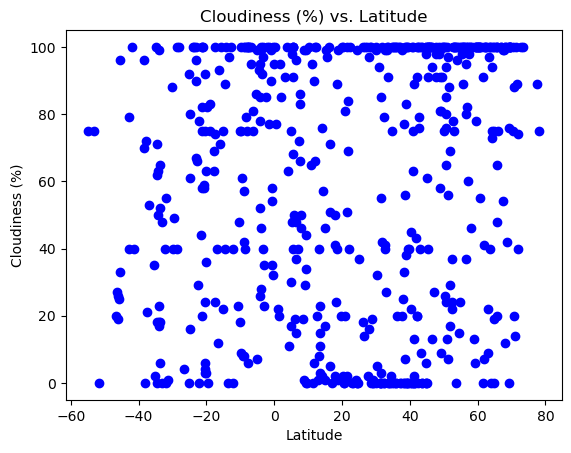

In [13]:
# Build the scatter plots for latitude vs. cloudiness
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [14]:
## Analysis
# The data appear to show that cloudiness is inconsistent and unpredictable overall.  However, it does appear that 100%
# cloudiness outnumbers scattered cloudiness, in the 10-90% range, as the solid dots at 100% seem to indicate.  There is
# a similar, but lesser, concentration at 0% cloudiness.

#### Latitude vs. Wind Speed Plot

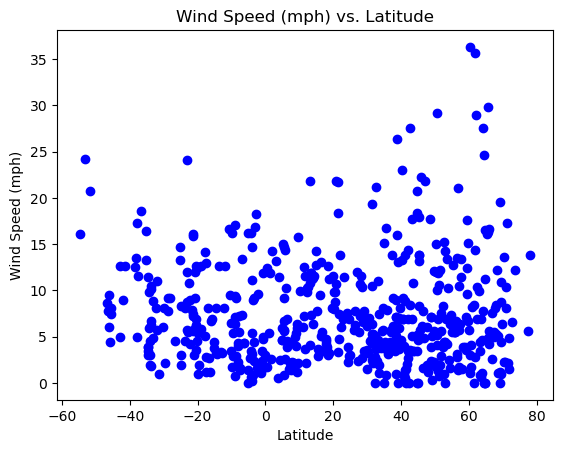

In [15]:
# Build the scatter plots for latitude vs. wind speed
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [16]:
## Analysis
# The data seem to show that wind speed increases at higher latitudes while remaining stable near the equator. Wind speed
# also appears to be generally lower at the lower latitudes vs. the wind speed at higher latitudes.  Wind speed variances
# between the lower and higher latitudes do not seem significant.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,torbay,47.6666,-52.7314,33.76,95,98,1.99,CA,1669161799
1,cherskiy,68.7500,161.3000,-38.49,100,42,1.07,RU,1669162034
2,naze,28.3667,129.4833,70.65,84,100,11.52,JP,1669162035
3,caravelas,-17.7125,-39.2481,71.64,89,69,5.03,BR,1669162036
4,olafsvik,64.8945,-23.7142,38.26,76,19,16.49,IS,1669162036
...,...,...,...,...,...,...,...,...,...
546,sosnovka,56.2550,51.2842,17.91,91,99,6.69,RU,1669162418
547,sfantu gheorghe,45.8667,25.7833,39.81,78,100,4.90,RO,1669162273
548,punta gorda,26.9298,-82.0454,75.24,88,100,11.99,US,1669162159


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,torbay,47.6666,-52.7314,33.76,95,98,1.99,CA,1669161799
1,cherskiy,68.7500,161.3000,-38.49,100,42,1.07,RU,1669162034
2,naze,28.3667,129.4833,70.65,84,100,11.52,JP,1669162035
4,olafsvik,64.8945,-23.7142,38.26,76,19,16.49,IS,1669162036
7,ostrovnoy,68.0531,39.5131,36.23,84,100,8.41,RU,1669162038


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,caravelas,-17.7125,-39.2481,71.64,89,69,5.03,BR,1669162036
5,broken hill,-31.9500,141.4333,64.06,48,0,5.73,AU,1669161953
6,ancud,-41.8697,-73.8203,55.45,98,100,8.93,CL,1669162038
8,busselton,-33.6500,115.3333,71.89,53,18,6.29,AU,1669162039
9,constitucion,-35.3333,-72.4167,60.57,79,35,16.40,CL,1669162040


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7226699905829498


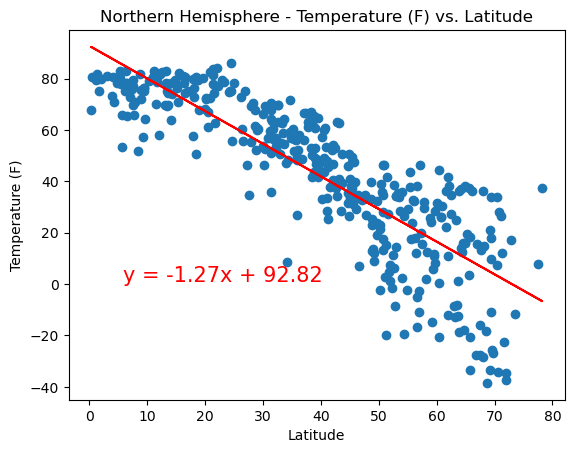

In [20]:
# Linear regression on Northern Hemisphere
%matplotlib inline
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [21]:
## Analysis
# With an R-value of 0.7345, the data show that there is a strong correlation between temperature a latitude. The plot also
# shows that as we move toward the equator, at 0 latitude, temperature increases, while moving toward the higher latitudes
# of the Northern Hemisphere, the temperature decreases.

The r-value is: 0.4137304232296309


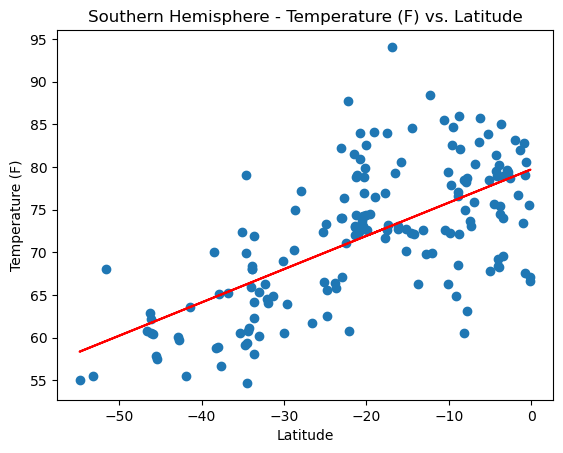

In [22]:
# Linear regression on Southern Hemisphere
%matplotlib inline
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [23]:
## Analysis
# With an R-value of .3409, there is a weaker correlation between temperature and latitude in the Southern Hemisphere.
# Still, temperatures do increase as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15377070005666038


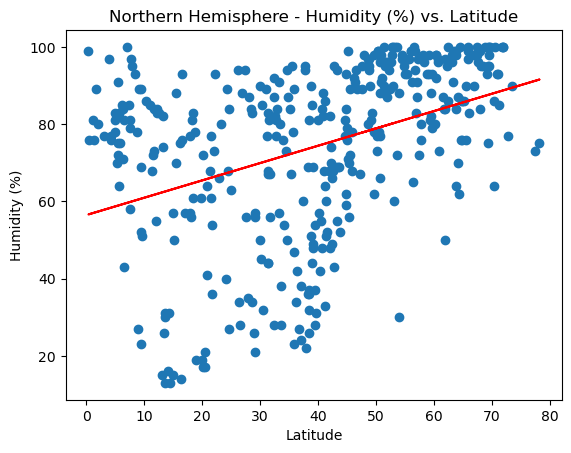

In [24]:
# Northern Hemisphere
%matplotlib inline
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [25]:
## Analysis
# With an R-value of .1305, there is a weak correlation between humidity and latitude. That said, humidity does increase
# as we move to higher latitudes.

The r-value is: 0.17848467191944345


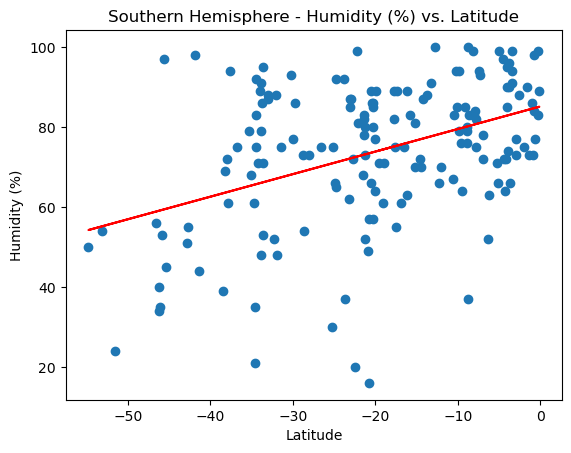

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [27]:
## Analysis
# With an R-value of .0602, there is really no correlation between humidity and latitude in the Southern Hemishere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.063184536120979


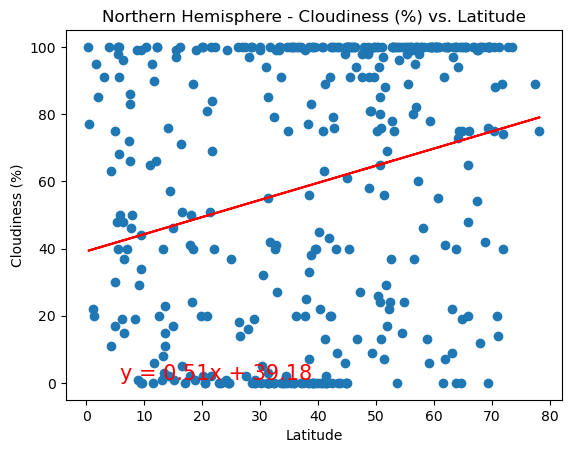

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()


In [29]:
## Analysis
# With an R-value of .0574, there is really no correlation between cloudiness and latitude in the Northern Hemishere.  Although,
# as mentioned previously, the concentrations of 100% and 0% cloudiness are interesting and could be an interesting study.

The r-value is: 0.07311696936480788


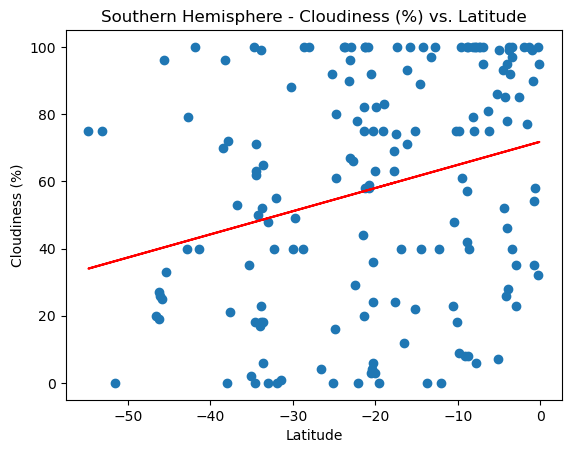

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [31]:
## Analysis
# With an R-value of .0029, there is really no correlation between cloudiness and latitude in the Southern Hemishere.  And,
# the concentrations of 100% and 0% cloudiness do not seem as pronounced.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003312312814588574


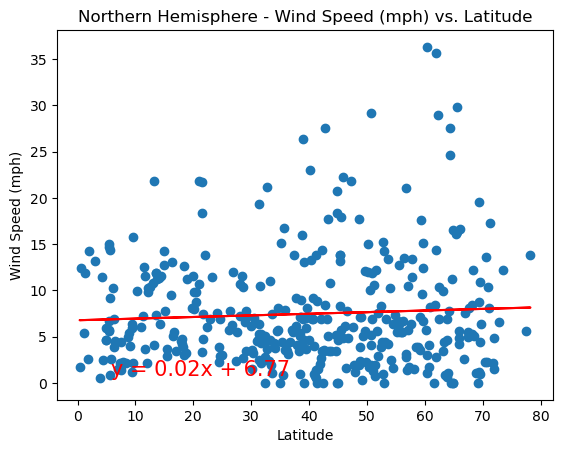

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [33]:
## Analysis
# With an R-value of .0176 and the plot we see, there is no correlation between the higher latitudes and wind speed.

The r-value is: 0.08212606406247638


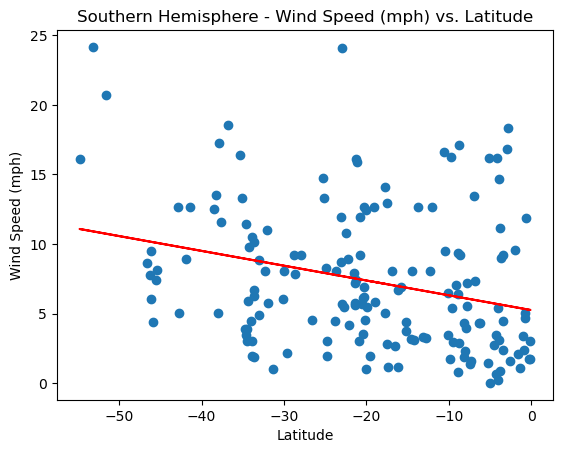

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [35]:
## Analysis
# With an R-value of .1615 and the plot we see, there appears to be a weak correlation between the lower latitudes and wind speed.
# Certainly more pronounced than the Northern Hemisphere.